ДЗ - построение ассоциативных правил для датасета :
Можно использовать например apriori, association_rules, fpgrowth из mlxtend.frequent_patterns (работают чуть быстрее).
Написать выводы. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import networkx as nx

In [2]:
data = pd.read_csv('dataset.csv', names = ['set_1', 'set_2', 'set_3', 'set_4', 'set_5', 'set_6', 'set_7',
                     'set_8', 'set_9', 'set_10', 'set_11', 'set_12', 'set_13', 'set_14'])      # Загружаем датасет
data.head()

,set_1,set_2,set_3,set_4,set_5,set_6,set_7,set_8,set_9,set_10,set_11,set_12,set_13,set_14
0,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,aluminum foil,all- purpose,dinner rolls,shampoo,all- purpose
1,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,dishwashing liquid/detergent,waffles,individual meals,hand soap,vegetables
2,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,sandwich loaves,poultry,toilet paper,ice cream,ketchup
3,juice,lunch meat,soda,toilet paper,all- purpose,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,flour,vegetables,pork,poultry,eggs


In [3]:
data.info() #Осматриваем данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   set_1   1499 non-null   object
 1   set_2   1499 non-null   object
 2   set_3   1499 non-null   object
 3   set_4   1499 non-null   object
 4   set_5   1499 non-null   object
 5   set_6   1448 non-null   object
 6   set_7   1411 non-null   object
 7   set_8   1356 non-null   object
 8   set_9   1300 non-null   object
 9   set_10  1241 non-null   object
 10  set_11  1203 non-null   object
 11  set_12  1156 non-null   object
 12  set_13  1103 non-null   object
 13  set_14  1044 non-null   object
dtypes: object(14)
memory usage: 164.1+ KB


In [4]:
data.shape

(1499, 14)

In [5]:
data = data.stack().groupby(level=0).apply(list).apply(lambda x: [i for i in x if str(i) != 'nan' and i != ' ']).reset_index(drop=True)

In [6]:
data.head()

0    [ pork,  sandwich bags,  lunch meat,  all- pur...
1    [ shampoo,  hand soap,  waffles,  vegetables, ...
2    [ pork,  soap,  ice cream,  toilet paper,  din...
3    [ juice,  lunch meat,  soda,  toilet paper,  a...
4    [ pasta,  tortillas,  mixes,  hand soap,  toil...
dtype: object

In [7]:
!!  pip install mlxtend

['Requirement already satisfied: mlxtend in d:\\anaconda\\lib\\site-packages (0.22.0)',
 'Requirement already satisfied: numpy>=1.16.2 in d:\\anaconda\\lib\\site-packages (from mlxtend) (1.23.5)',
 'Requirement already satisfied: scipy>=1.2.1 in d:\\anaconda\\lib\\site-packages (from mlxtend) (1.9.1)',
 'Requirement already satisfied: setuptools in d:\\anaconda\\lib\\site-packages (from mlxtend) (63.4.1)',
 'Requirement already satisfied: pandas>=0.24.2 in d:\\anaconda\\lib\\site-packages (from mlxtend) (1.4.4)',
 'Requirement already satisfied: scikit-learn>=1.0.2 in d:\\anaconda\\lib\\site-packages (from mlxtend) (1.0.2)',
 'Requirement already satisfied: matplotlib>=3.0.0 in d:\\anaconda\\lib\\site-packages (from mlxtend) (3.5.2)',
 'Requirement already satisfied: joblib>=0.13.2 in d:\\anaconda\\lib\\site-packages (from mlxtend) (1.1.0)',
 'Requirement already satisfied: pillow>=6.2.0 in d:\\anaconda\\lib\\site-packages (from matplotlib>=3.0.0->mlxtend) (9.2.0)',
 'Requirement alrea

In [9]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D

In [10]:
encoder = TransactionEncoder()

In [22]:
%%time
tr_data = pd.DataFrame(encoder.fit(data).transform(data), columns = encoder.columns_)

Wall time: 19 ms


In [12]:
tr_data

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,True,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1495,False,False,False,False,False,True,True,False,True,False,...,False,True,False,True,False,False,False,True,False,False
1496,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,True,False,True,True,False,False
1497,True,False,False,True,False,False,True,False,False,False,...,False,True,False,True,True,True,False,False,True,True


In [13]:
tr_data.shape

(1499, 38)

In [14]:
6/len(data)

0.004002668445630421

In [21]:
%%time
apriori_data = apriori(tr_data, min_support = 6/len(data), use_colnames = True, max_len = 3)
as_rules = association_rules(apriori_data, metric = 'lift', min_threshold = 1.5)

Wall time: 282 ms


In [16]:
as_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( aluminum foil, tortillas)",( sandwich loaves),0.058706,0.248833,0.022015,0.375000,1.507038,0.007407,1.201868,0.357430
1,( sandwich loaves),"( aluminum foil, tortillas)",0.248833,0.058706,0.022015,0.088472,1.507038,0.007407,1.032655,0.447898
2,"( cheeses, beef)",( sandwich bags),0.066711,0.250167,0.025350,0.380000,1.518987,0.008661,1.209408,0.366089
3,( sandwich bags),"( cheeses, beef)",0.250167,0.066711,0.025350,0.101333,1.518987,0.008661,1.038526,0.455656
4,"( mixes, beef)",( pork),0.065377,0.250167,0.025350,0.387755,1.549986,0.008995,1.224728,0.379654
5,( pork),"( mixes, beef)",0.250167,0.065377,0.025350,0.101333,1.549986,0.008995,1.040011,0.473216
6,"( cheeses, sandwich loaves)",( soap),0.064710,0.265510,0.026017,0.402062,1.514298,0.008836,1.228371,0.363126
7,( soap),"( cheeses, sandwich loaves)",0.265510,0.064710,0.026017,0.097990,1.514298,0.008836,1.036896,0.462400
8,"( dishwashing liquid/detergent, spaghetti sauce)",( fruits),0.061374,0.263509,0.025350,0.413043,1.567474,0.009178,1.254762,0.385703
9,( fruits),"( dishwashing liquid/detergent, spaghetti sauce)",0.263509,0.061374,0.025350,0.096203,1.567474,0.009178,1.038535,0.491562


In [17]:
apriori_data

,support,itemsets
0,0.263509,( all- purpose)
1,0.264176,( aluminum foil)
2,0.278185,( bagels)
3,0.262842,( beef)
4,0.261508,( butter)
...,...,...
9172,0.030020,"( toilet paper, yogurt, waffles)"
9173,0.036024,"( waffles, vegetables, tortillas)"
9174,0.045364,"( yogurt, vegetables, tortillas)"
9175,0.014676,"( waffles, yogurt, tortillas)"


<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\Vitali Lagun\AppData\Local\Temp\ipykernel_1176\227499824.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


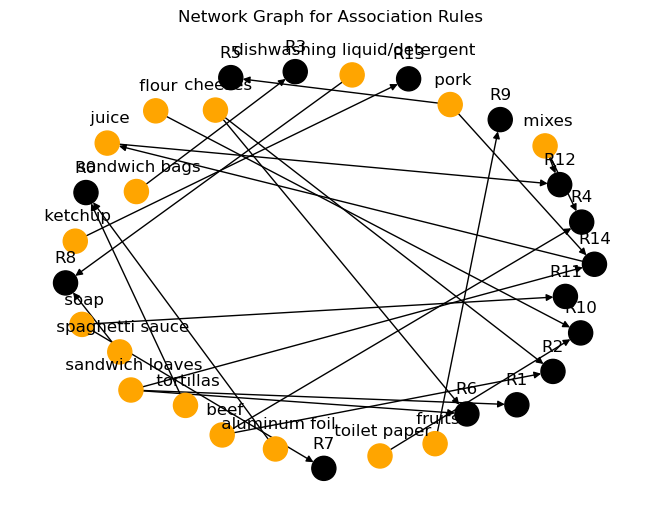

In [18]:
def draw_network(as_rules, rules_to_show):
  # Ориентированный граф от NetworkX
    network = nx.DiGraph()
  
  # Перебор количества правил для отображения
    for i in range(rules_to_show):
    
    # Добавление узла правила
        network.add_nodes_from(["R"+str(i)])
        for antecedents in as_rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in as_rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

    color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
        else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
    pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
    nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
    for p in pos:  
         pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)
    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(as_rules, 15);

In [20]:
%%time
ap_rules = as_rules[as_rules['consequents'].astype(str).str.contains(' juice')]
ap_rules = ap_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(ap_rules.head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( yogurt, sandwich loaves)",( juice),0.064043,0.257505,0.026017,0.406250,1.577639,0.009526,1.250518,0.391195
1,"( pork, sandwich loaves)",( juice),0.060707,0.257505,0.024016,0.395604,1.536298,0.008384,1.228492,0.371646
2,( ketchup),"( mixes, juice)",0.250167,0.071381,0.027352,0.109333,1.531688,0.009494,1.042611,0.462937


Wall time: 20 ms


Вывод : Следуя из полученных результатов, как я понимаю, что б стимулировать продажи сока, его необходимо размещать рядом с кетчупом, сэндвичами и йогуртом.

Попробуем сгенерировать правила ассоциации с помощью association_rules

In [33]:
ap_rules = association_rules(apriori_data, metric="lift", min_threshold=1.5)

In [34]:
ap_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"( aluminum foil, tortillas)",( sandwich loaves),0.058706,0.248833,0.022015,0.375000,1.507038,0.007407,1.201868,0.357430
1,( sandwich loaves),"( aluminum foil, tortillas)",0.248833,0.058706,0.022015,0.088472,1.507038,0.007407,1.032655,0.447898
2,"( cheeses, beef)",( sandwich bags),0.066711,0.250167,0.025350,0.380000,1.518987,0.008661,1.209408,0.366089
3,( sandwich bags),"( cheeses, beef)",0.250167,0.066711,0.025350,0.101333,1.518987,0.008661,1.038526,0.455656
4,"( mixes, beef)",( pork),0.065377,0.250167,0.025350,0.387755,1.549986,0.008995,1.224728,0.379654
5,( pork),"( mixes, beef)",0.250167,0.065377,0.025350,0.101333,1.549986,0.008995,1.040011,0.473216
6,"( cheeses, sandwich loaves)",( soap),0.064710,0.265510,0.026017,0.402062,1.514298,0.008836,1.228371,0.363126
7,( soap),"( cheeses, sandwich loaves)",0.265510,0.064710,0.026017,0.097990,1.514298,0.008836,1.036896,0.462400
8,"( dishwashing liquid/detergent, spaghetti sauce)",( fruits),0.061374,0.263509,0.025350,0.413043,1.567474,0.009178,1.254762,0.385703
9,( fruits),"( dishwashing liquid/detergent, spaghetti sauce)",0.263509,0.061374,0.025350,0.096203,1.567474,0.009178,1.038535,0.491562


Честно, не особо понял что получилось, по идеи, мера взаимосвязи между товарами, учитывающая поддержку каждого товара, раз мы выбрали меткику "lift"